In [1]:
pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for 10 digits
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 72ms/step - accuracy: 0.8614 - loss: 0.4645 - val_accuracy: 0.9810 - val_loss: 0.0616
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 70s 59ms/step - accuracy: 0.9819 - loss: 0.0610 - val_accuracy: 0.9863 - val_loss: 0.0481
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9888 - val_loss: 0.0391
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9893 - val_loss: 0.0357


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9874 - loss: 0.0399
Test accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted digit: 7


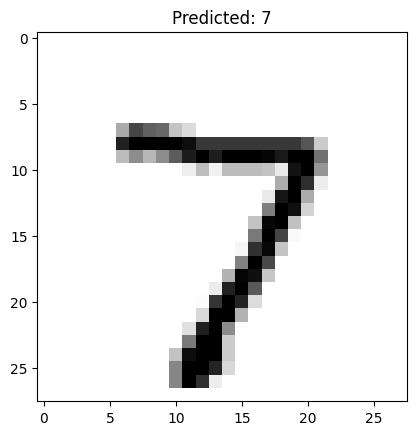

In [8]:
# Pick a test image
test_image = test_images[0].reshape(1, 28, 28, 1)

# Predict the class
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

print(f"Predicted digit: {predicted_class}")

# Display the image
plt.imshow(test_image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_class}")
plt.show()
